<a href="https://colab.research.google.com/github/naveenkumarch/CE888Lab/blob/main/Lab_3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/bank-additional-full.csv", delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [20]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [21]:
df.y.unique()

array(['no', 'yes'], dtype=object)

no     36548
yes     4640
Name: y, dtype: int64


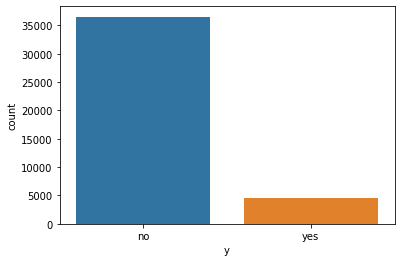

In [22]:
print(df.y.value_counts())
sns.countplot(x = df.y)

In [23]:
label = df.y.astype("str")

In [24]:
df.drop("y", inplace = True, axis = 1)

In [25]:
df.drop("duration",inplace = True,axis =1)

In [26]:
df = pd.get_dummies(df)

In [27]:
corr_matrix = df.corr()
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

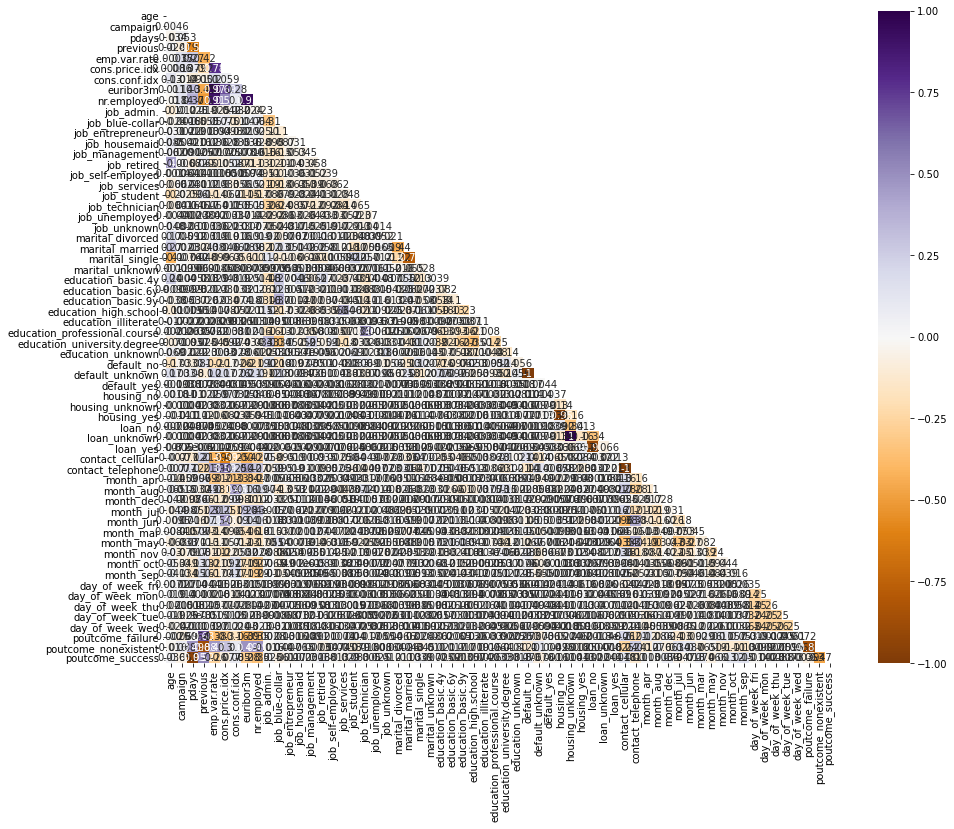

In [28]:
# Plotting the correlation matrix 
f,ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr_matrix, mask =mask,cmap='PuOr',annot = True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   job_admin.                     41188 non-null  uint8  
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

In [34]:
for i in range(len(label)):
  if label[i] == "yes":
    label[i] = "label1"
  else:
    label[i] = "label2"

In [35]:
label.value_counts()

label2    36548
label1     4640
Name: y, dtype: int64

In [41]:
label = LabelEncoder().fit_transform(label)

In [50]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit , StratifiedKFold

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.20, random_state=50,shuffle  =True, stratify = label)

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn import metrics

In [45]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)
print("Dummy ACC: %.2f" % acc(y_test, dummy_clf.predict(X_test)))

Dummy ACC: 0.80


In [69]:
param_grid = {
    'n_estimators' : np.arange(10,100,10),
    'max_depth': np.arange(3,31,3),
    'criterion':['gini', 'entropy'],
    'min_samples_split':np.arange(2,20,4),
    
}

In [53]:
RF_clf = RandomForestClassifier(n_estimators = 100, max_depth = 3)

In [70]:
RF = RandomForestClassifier()

In [51]:
cv = StratifiedKFold(n_splits=10,shuffle =True)

In [56]:
RF_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
y_predict = RF_clf.predict(X_test)

In [58]:
print("Dummy ACC: %.2f" % acc(y_test, RF_clf.predict(X_test)))

Dummy ACC: 0.90


In [60]:
# Calculating and printing matrix and Classification report 
RF_conf_mat = confusion_matrix(y_test, y_predict)
print("Confusion Matrix")
print(RF_conf_mat)
print('\n')
print("Classification Report")
print(classification_report(y_test, y_predict))

Confusion Matrix
[[ 139  789]
 [  60 7250]]


Classification Report
              precision    recall  f1-score   support

           0       0.70      0.15      0.25       928
           1       0.90      0.99      0.94      7310

    accuracy                           0.90      8238
   macro avg       0.80      0.57      0.60      8238
weighted avg       0.88      0.90      0.87      8238



In [71]:
RF_grid = GridSearchCV(RF, param_grid,cv = cv, verbose = 50, n_jobs=-1)

In [72]:
RF_grid.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
[Parallel(n_jobs=-1)]: Done 3999 tasks      | elapsed: 70.1min
[Parallel(n_jobs=-1)]: Done 4000 tasks      | elapsed: 70.1min
[Parallel(n_jobs=-1)]: Done 4001 tasks      | elapsed: 70.1min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed: 70.2min
[Parallel(n_jobs=-1)]: Done 4003 tasks      | elapsed: 70.2min
[Parallel(n_jobs=-1)]: Done 4004 tasks      | elapsed: 70.2min
[Parallel(n_jobs=-1)]: Done 4005 tasks      | elapsed: 70.2min
[Parallel(n_jobs=-1)]: Done 4006 tasks      | elapsed: 70.2min
[Parallel(n_jobs=-1)]: Done 4007 tasks      | elapsed: 70.3min
[Parallel(n_jobs=-1)]: Done 4008 tasks      | elapsed: 70.3min
[Parallel(n_jobs=-1)]: Done 4009 tasks      | elapsed: 70.3min
[Parallel(n_jobs=-1)]: Done 4010 tasks      | elapsed: 70.3min
[Parallel(n_jobs=-1)]: Done 4011 tasks      | elapsed: 70.4min
[Parallel(n_jobs=-1)]: Done 4012 tasks      | elapsed: 70.4min
[Parallel(n_jobs=-1)]: Done 4013 tasks      | elapsed: 70.4min
[Par

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,...
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_s

In [73]:
print('\nBest Train Accuracy : %.2f'%RF_grid.best_score_, ' Best Params : ', str(RF_grid.best_params_))


Best Train Accuracy : 0.90  Best Params :  {'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 14, 'n_estimators': 90}


In [74]:
# Making predictions on Test data 
y_tree_pred = RF_grid.best_estimator_.predict(X_test)

In [79]:
print(" Validation Accuracy:",accuracy_score(y_test, y_tree_pred))
Validation_score = {'Decision_tree':accuracy_score(y_test, y_tree_pred)}

 Validation Accuracy: 0.8986404467103666


In [80]:
tree_conf_mat = confusion_matrix(y_test, y_tree_pred)
print("Confusion Matrix")
print(tree_conf_mat)
print('\n')
print("Classification Report")
print(classification_report(y_test, y_tree_pred))

Confusion Matrix
[[ 211  717]
 [ 118 7192]]


Classification Report
              precision    recall  f1-score   support

           0       0.64      0.23      0.34       928
           1       0.91      0.98      0.95      7310

    accuracy                           0.90      8238
   macro avg       0.78      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238



In [95]:
RF1 = RandomForestClassifier(n_estimators = 250, max_depth = 6, random_state=60)

In [96]:
f1_scores = cross_val_score(RF1,X_train,y_train, cv = StratifiedKFold(n_splits=10,shuffle =True),scoring = ('f1'))

In [89]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [97]:
f1_scores.mean()

0.9462645700457522